In [3]:
import os
import pandas as pd
import numpy as np
from GoogleNews import GoogleNews
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from os import path
from nltk.corpus import stopwords
from textblob import TextBlob
import statsmodels.api as sm
from scipy import stats
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')
from scipy.stats import shapiro

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In order to extract articles I'm going to use a library called GoogleNews
https://pypi.org/project/GoogleNews/

license here:
https://github.com/Iceloof/GoogleNews/blob/master/LICENSE

In [4]:
dict_time = {'06/01/2020' : '12/31/2020',
             '06/01/2021' : '12/31/2021',
             '06/01/2022' : '12/31/2022',
             '06/01/2023' : '12/31/2023',
             '06/01/2019' : '12/31/2019',
             '06/01/2018' : '12/31/2018',
             '06/01/2017' : '12/31/2017',
             '06/01/2016' : '12/31/2016',
             '06/01/2015' : '12/31/2015',
             '06/01/2014' : '12/31/2014',
             '01/01/2020' : '06/01/2020',
             '01/01/2021' : '06/01/2021',
             '01/01/2022' : '06/01/2022',
             '01/01/2023' : '06/01/2023',
             '01/01/2019' : '06/01/2019',
             '01/01/2018' : '06/01/2018',
             '01/01/2017' : '06/01/2017',
             '01/01/2016' : '06/01/2016',
             '01/01/2015' : '06/01/2015',
             '01/01/2014' : '06/01/2014'}

def search_gn(s):
  df_final = pd.DataFrame()
  for x in dict_time:
    googlenews = GoogleNews(start=x,end=dict_time[x])
    googlenews.get_news(s)
    googlenews.enableException(True)
    result_FINAL = googlenews.result(sort=True)
    df_n = pd.DataFrame(result_FINAL)
    df_n['year'] = dict_time[x]
    df_n['year']= df_n['year'].str[-4:]
    df_final = df_final.append(df_n)
    
  return df_final

In [5]:
Ireland = search_gn('Housing Ireland') 
Uk = search_gn('Housing UK') 
USA = search_gn('Housing USA') 

C:\Users\santi\AppData\Local\Temp\ipykernel_5500\2152687020.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_n)
C:\Users\santi\AppData\Local\Temp\ipykernel_5500\2152687020.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_n)
C:\Users\santi\AppData\Local\Temp\ipykernel_5500\2152687020.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_n)
C:\Users\santi\AppData\Local\Temp\ipykernel_5500\2152687020.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_n)
C:\Users\santi\AppData\Local\Temp\ipykernel_5500\2152687020.

In [11]:
_Ireland = Ireland.drop_duplicates()
_Uk = Uk.drop_duplicates()
_USA = USA.drop_duplicates()

_Ireland['Country'] = 'Eire'
_Uk['Country'] = 'UK'
_USA['Country'] = 'USA'

C:\Users\santi\AppData\Local\Temp\ipykernel_5500\1810116221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _Ireland['Country'] = 'Eire'
C:\Users\santi\AppData\Local\Temp\ipykernel_5500\1810116221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _Uk['Country'] = 'UK'
C:\Users\santi\AppData\Local\Temp\ipykernel_5500\1810116221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [12]:
frames = [_Ireland,_USA,_Uk]
Headlines = pd.concat(frames)
Headlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4306 entries, 0 to 74
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     4306 non-null   object        
 1   desc      0 non-null      object        
 2   date      4306 non-null   object        
 3   datetime  4306 non-null   datetime64[ns]
 4   link      4306 non-null   object        
 5   img       4306 non-null   object        
 6   media     4306 non-null   object        
 7   site      0 non-null      object        
 8   year      4306 non-null   object        
 9   Country   4306 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 370.0+ KB


MYSQL STUFF

In [22]:
Headlines.to_csv('C:\\Users\\santi\\OneDrive\\Desktop\\CA\\ok.csv')

In [14]:
import mysql.connector

host="localhost" # "127.0.0.1"
user="root" # root
password="Dublino1@" # root password

In [ ]:
for row,r in Headlines.iterrows():
    print(r)

In [15]:
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    port = 3306
)
print(db)
conn = db.cursor()

conn.execute(''' CREATE DATABASE IF NOT EXISTS headlines; 
             USE headlines; 
             CREATE TABLE IF NOT EXISTS News (  _title VARCHAR(255), _year INT, _media VARCHAR(255), _country VARCHAR(255));''')

db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    port = 3306 )
conn = db.cursor()

sql = ''' USE headlines; INSERT INTO News (_title, _media, _country, _year)
        VALUES (%s, %s, %s, %s)
    '''
for i,row in Headlines.iterrows():
    conn.execute(sql, (row[0],row[6],row[9],row[8]))
    conn.close()
    db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    port = 3306 )
    conn = db.cursor()

In [16]:
db.commit()
conn.close()
db.close()

In [19]:
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    port = 3306 )
conn = db.cursor()
conn.execute('''USE headlines; SELECT * FROM News''')

In [20]:
for result in conn:
    print(result)

In [203]:
Headlines.head()

,title,desc,date,datetime,link,img,media,site,year,Country
0,Residents and homeless asylum seekers appeal f...,None,1 hour ago,2023-05-05 23:59:23.872781,news.google.com/./articles/CBMiR2h0dHBzOi8vd3d...,https://encrypted-tbn0.gstatic.com/faviconV2?u...,RTE.ie,None,2020,Eire
1,Developers should explain failure to complete ...,None,5 hours ago,2023-05-05 19:59:23.863760,news.google.com/./articles/CBMiNWh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/pZ5_jocQtI4K...,Irish Examiner,None,2020,Eire
2,IDA: US medtech firm Dexcom 'confident' about ...,None,6 hours ago,2023-05-05 18:59:23.857513,news.google.com/./articles/CBMiQ2h0dHBzOi8vd3d...,https://lh3.googleusercontent.com/pZ5_jocQtI4K...,Irish Examiner,None,2020,Eire
3,Hospitals exploring housing staff as accommoda...,None,8 hours ago,2023-05-05 16:59:23.857513,news.google.com/./articles/CBMieWh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/SdqfETkyt1XH...,The Irish Times,None,2020,Eire
4,Ireland Has Lowest Investment in Housing Among...,None,8 hours ago,2023-05-05 16:59:23.856514,news.google.com/./articles/CBMiQmh0dHBzOi8vYnV...,https://encrypted-tbn0.gstatic.com/faviconV2?u...,Business Plus,None,2020,Eire


In [204]:
headlines = Headlines[['title','media','year','Country']]
headlines.head()

,title,media,year,Country
0,Residents and homeless asylum seekers appeal f...,RTE.ie,2020,Eire
1,Developers should explain failure to complete ...,Irish Examiner,2020,Eire
2,IDA: US medtech firm Dexcom 'confident' about ...,Irish Examiner,2020,Eire
3,Hospitals exploring housing staff as accommoda...,The Irish Times,2020,Eire
4,Ireland Has Lowest Investment in Housing Among...,Business Plus,2020,Eire


In [205]:
headlines.isna().sum()

title      0
media      0
year       0
Country    0
dtype: int64

Text(0.5, 1.0, 'Number of articles by newspaper')

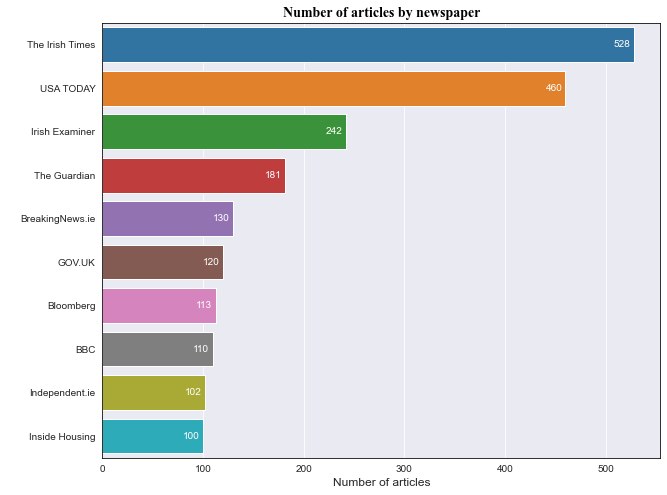

In [282]:
custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)
ax = sns.countplot(y=headlines["media"], order=headlines.media.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0], padding=-20, color='white', fontsize=10)
headlines["media"].unique()
ax.set_xlabel("Number of articles",fontsize=12)
ax.set_ylabel(" ")
ax.set_title("Number of articles by newspaper",fontsize=14,color= "black", weight='bold',fontname="Times New Roman")

Text(0.5, 1.0, 'Number of articles by year')

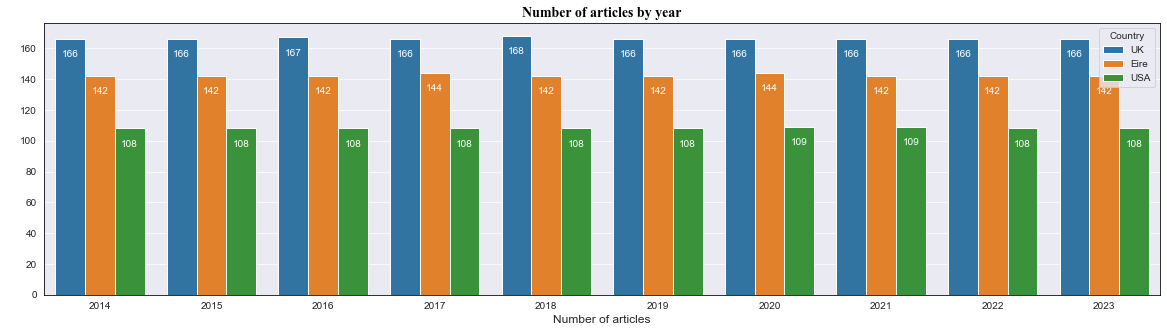

In [283]:
plt.rc('figure', figsize=(20, 5))
ax = sns.countplot(x=headlines["year"], hue=headlines['Country'])
for x in range(3):
    ax.bar_label(ax.containers[x], padding=-20, color='white', fontsize=10)
ax.set_xlabel("Number of articles",fontsize=12)
ax.set_ylabel(" ")
ax.set_title("Number of articles by year",fontsize=14,color= "black", weight='bold',fontname="Times New Roman")

In [207]:
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity  #there's also subjectivity if we want
    except:
        return None

headlines['polarity'] = headlines['title'].apply(sentiment_calc)

C:\Users\santi\AppData\Local\Temp/ipykernel_28808/3791301456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines['polarity'] = headlines['title'].apply(sentiment_calc)


In [208]:
headlines.head()

,title,media,year,Country,polarity
0,Residents and homeless asylum seekers appeal f...,RTE.ie,2020,Eire,0.000000
1,Developers should explain failure to complete ...,Irish Examiner,2020,Eire,-0.108333
2,IDA: US medtech firm Dexcom 'confident' about ...,Irish Examiner,2020,Eire,0.150000
3,Hospitals exploring housing staff as accommoda...,The Irish Times,2020,Eire,0.000000
4,Ireland Has Lowest Investment in Housing Among...,Business Plus,2020,Eire,0.000000


<AxesSubplot:xlabel='Country', ylabel='polarity'>

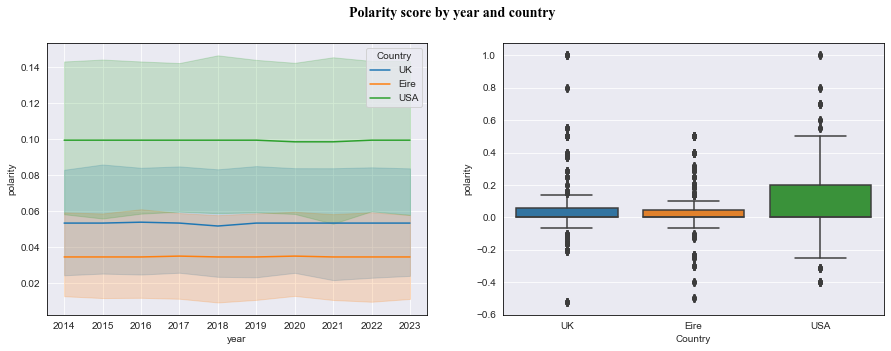

In [285]:
headlines = headlines.sort_values('year')
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Polarity score by year and country',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)
sns.lineplot(data = headlines,x='year',y='polarity',hue='Country',ax=ax[0])
sns.boxplot(y= 'polarity',data=headlines,x='Country',ax=ax[1])

p value 0.0
stat value 0.7578840255737305


c:\Users\santi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


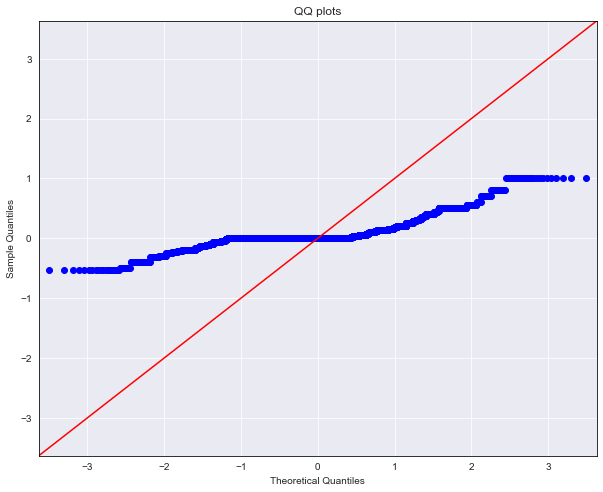

In [250]:
plt.rc('figure', figsize=(10, 8))
fig = sm.qqplot(headlines['polarity'], line='45')
plt.title('QQ plots')
stat, p = shapiro(headlines['polarity'])
print('p value ' + str(p))
print('stat value ' + str(stat))

In [211]:
a = headlines[headlines['Country']=='Eire']
b = headlines[headlines['Country']=='USA'] 
c = headlines[headlines['Country']=='UK']

stats.kruskal(a['polarity'],b['polarity'],c['polarity'])

KruskalResult(statistic=38.73287164709808, pvalue=3.883861976621333e-09)

In [212]:
import string
stopwords = set(stopwords.words("english"))
stopwords.add('housing')
stopwords.add('house')
stopwords.add('ireland')
stopwords.add('usa')
stopwords.add('uk')
stopwords.add('us')
stopwords.add(' ')
stopwords.add('')
stopwords.add('home')
stopwords.add('homes')
stopwords.add('irish')


In [213]:

def tk(x):
    text = x.str.cat(sep=' ')
    tokens = nltk.word_tokenize(text)
    tokens = [''.join(char for char in item if char not in string.punctuation) for item in tokens]
    tokens = [x.lower() for x in tokens]
    filtered_token = []
    for w in tokens:
        if w not in stopwords:
          filtered_token.append(w)
    return filtered_token

eire = tk(a['title'])
USA = tk(b['title'])
uk = tk(c['title'])


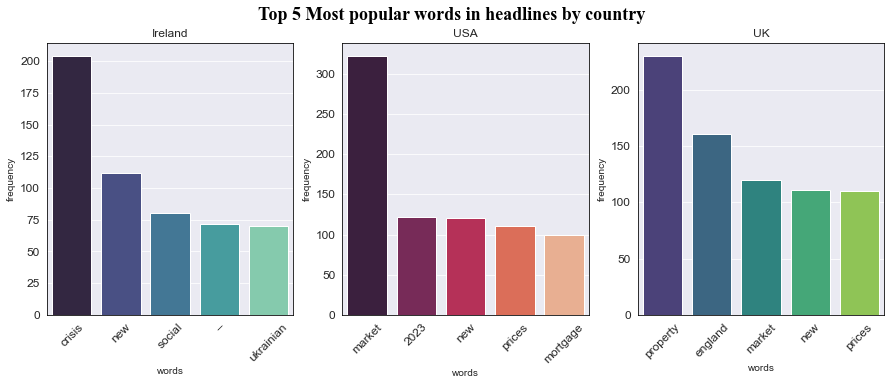

In [286]:
from collections import Counter
fig, ax = plt.subplots(1,3,figsize=(15, 5))
fig.suptitle('Top 5 Most popular words in headlines by country',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
a = Counter(eire)
a = pd.DataFrame.from_dict(a, orient='index').reset_index()
sns.barplot(y=0 ,x='index',data=a.nlargest(5, 0), ax=ax[0], palette= 'mako')
ax[0].set_title('Ireland')
ax[0].set(xlabel='words', ylabel='frequency')
ax[0].tick_params(axis='x',labelrotation=45, labelsize=12)
ax[0].tick_params(labelsize=12)
a = Counter(USA)
a = pd.DataFrame.from_dict(a, orient='index').reset_index()
sns.barplot(y=0,x='index',data=a.nlargest(5, 0),ax=ax[1], palette= 'rocket')
ax[1].set_title('USA')
ax[1].set(xlabel='words', ylabel='frequency')
ax[1].tick_params(axis='x',labelrotation=45,labelsize=12)
ax[1].tick_params(labelsize=12)
a = Counter(uk)
a = pd.DataFrame.from_dict(a, orient='index').reset_index()
sns.barplot(y=0,x='index',data=a.nlargest(5, 0), ax=ax[2], palette= 'viridis')
ax[2].set_title('UK')
ax[2].set(xlabel='words', ylabel='frequency')
ax[2].tick_params(axis='x',labelrotation=45,labelsize=12)
ax[2].tick_params(labelsize=12)


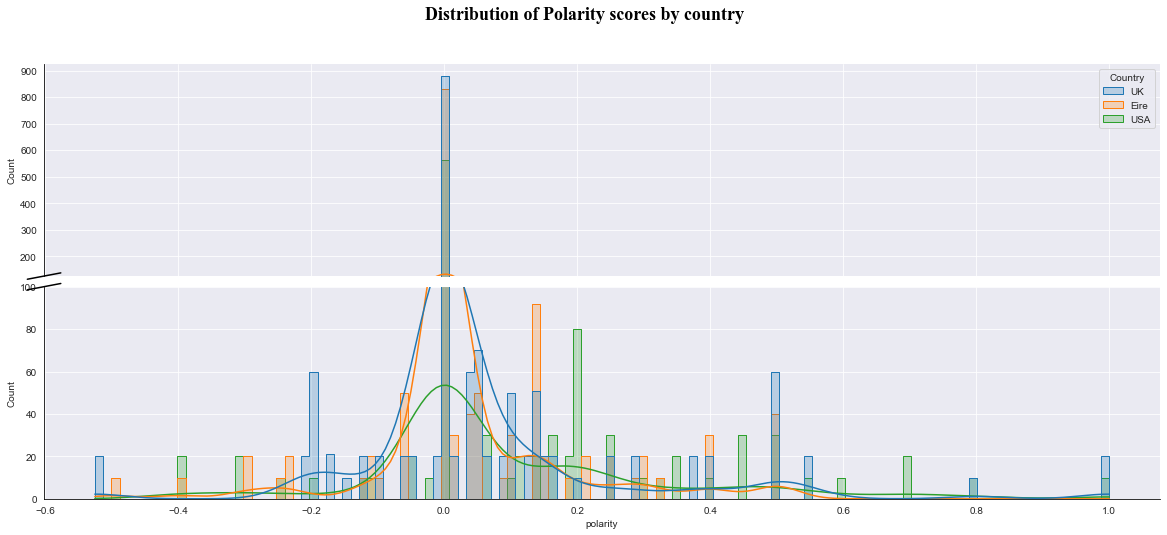

In [287]:
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05},figsize=(20, 8))
f.suptitle('Distribution of Polarity scores by country',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
sns.histplot(x= 'polarity',data=headlines, hue='Country',kde=True , ax=ax_top, element="step")
sns.histplot(x= 'polarity',data=headlines, hue='Country',kde=True , ax=ax_bottom, element="step")
ax_top.set_ylim(bottom=125) 
ax_bottom.set_ylim(0,100)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

ax_bottom.legend_.remove()
plt.show()

#### real sentiment analysis

In [216]:
Ire = Headlines[['title','media','Country','year']]
Ire = Ire[Ire['Country']=='Eire']

In [217]:
Ire.head()

,title,media,Country,year
0,Residents and homeless asylum seekers appeal f...,RTE.ie,Eire,2020
1,Developers should explain failure to complete ...,Irish Examiner,Eire,2020
2,IDA: US medtech firm Dexcom 'confident' about ...,Irish Examiner,Eire,2020
3,Hospitals exploring housing staff as accommoda...,The Irish Times,Eire,2020
4,Ireland Has Lowest Investment in Housing Among...,Business Plus,Eire,2020


In [218]:
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
    return True

In [226]:
data_cleaned = []
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

for doc in Ire['title']:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in stopwords)
    data_cleaned.append(doc_cleaned)

In [230]:
data_cleaned

['resident homeless asylum seeker appeal help',
 'developer explain failure complete project',
 'medtech firm dexcom expansion',
 'hospital exploring staff accommodation shortage hit',
 'lowest investment among western',
 'reappointment three director western',
 'country market',
 'five view week mayo dublin',
 'shortage threatening state body warns',
 'residential face agm revolt investor push sale',
 'homeless asylum hard sleeping',
 'ukrainian refugee complained mouse black mould',
 'martin leahy singing tune crisis',
 'using timber part solution',
 'residential construction cost study published',
 'paul fix need make use ida playbook',
 'building dublin cost europe due government told',
 'rise body last year saw almost social cost rental delivered',
 'nurse caught six month many think leaving country',
 'clare county council postpones plan demolish six',
 'cabinteely land scope new guiding',
 'local authority service threatened vote',
 'cabinet discus impact ukrainian upcoming',
 '

In [231]:
from sklearn.feature_extraction.text import CountVectorizer

# Declare and create an array (count_vector) by calling a method CountVectorizer()
count_vector = CountVectorizer(stop_words = "english", max_features = None, max_df = 0.5, min_df = 2)
data = count_vector.fit_transform(data_cleaned)

In [232]:
from sklearn.decomposition import LatentDirichletAllocation

# Declare and initialise a variable t
t = 5

# Declare and initialise an object 'lda' by calling a method LatentDirichletAllocation()
lda = LatentDirichletAllocation(n_components = t, learning_method = 'batch', random_state = 42)

# Train the model
lda.fit(data)

# Print all lda components
print(lda.components_)

# Get all feature names
terms = count_vector.get_feature_names_out()

[[30.23828684 20.19998364  0.20001115 ...  0.20000611  0.20000554
  10.19030269]
 [ 0.2000126   0.2000036   0.20000861 ... 40.19997696  0.20000427
   0.20000652]
 [10.15307575  0.20000477  0.2000112  ...  0.20000621  0.20000551
  20.20967545]
 [ 0.20001393  0.20000415 30.23194197 ...  0.20000558  0.20000494
   0.20000798]
 [30.20861089  0.20000384 10.16802706 ...  0.20000514 10.19997973
   0.20000735]]


In [233]:
for topic_idx, topic in enumerate(lda.components_):
        print("Topic {}:" .format(topic_idx))
        print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic 0:
government view social accommodation time land ukrainian impact crisis dublin
Topic 1:
landlord dublin appeal record stall crisis young social asylum homeless
Topic 2:
tax year plan market modular state land new ukrainian refugee
Topic 3:
nursing project residential investor shortage private action face sale needed
Topic 4:
big fix ida damp accommodation construction hit cost need crisis


#### 2nd method

In [278]:
corpus = Ire['title']
vectorizer = CountVectorizer(
                             stop_words = 'english')
X = vectorizer.fit_transform(corpus)

# Display the feature names in sorted order
topic = vectorizer.get_feature_names_out()
_topic = [lemmatizer.lemmatize(word) for word in topic if is_letter_only(word)]
print(_topic)

['accommodation', 'acquiring', 'action', 'activity', 'actually', 'admits', 'adversely', 'affecting', 'agm', 'ahead', 'airbnb', 'amid', 'analysis', 'appeal', 'appeal', 'apprenticeship', 'approach', 'asked', 'asylum', 'australian', 'authority', 'ban', 'bang', 'benefit', 'bid', 'biden', 'big', 'biggest', 'billion', 'black', 'blackrock', 'body', 'body', 'boom', 'bord', 'brien', 'bring', 'broken', 'bubble', 'builder', 'building', 'build', 'burst', 'buy', 'buying', 'cabinet', 'cabinteely', 'call', 'cater', 'caught', 'ceo', 'change', 'changed', 'changing', 'charity', 'child', 'ciarán', 'city', 'claim', 'clare', 'cliff', 'closure', 'coalition', 'cold', 'colleague', 'comedian', 'community', 'competitiveness', 'complained', 'complete', 'confident', 'confinement', 'constructed', 'construction', 'contacting', 'contract', 'converted', 'cork', 'cost', 'cost', 'council', 'country', 'county', 'court', 'coveney', 'covid', 'crisis', 'criticised', 'criticism', 'curb', 'cusp', 'cut', 'damp', 'darragh', 'd

accommodation acquiring action activity actually admits adversely affecting agm ahead airbnb amid analysis appeal appeal apprenticeship approach asked asylum australian authority ban bang benefit bid biden big biggest billion black blackrock body body boom bord brien bring broken bubble builder building build burst buy buying cabinet cabinteely call cater caught ceo change changed changing charity child ciarán city claim clare cliff closure coalition cold colleague comedian community competitiveness complained complete confident confinement constructed construction contacting contract converted cork cost cost council country county court coveney covid crisis criticised criticism curb cusp cut damp darragh debate decade defends deliver delivered demand demand demolish denied design deterring developer development dexcom difficult director disarray discus disruption donnelly doubt dream drive drogheda dublin efficiency electricity eligible employee end energy estate eu europe eviction ex

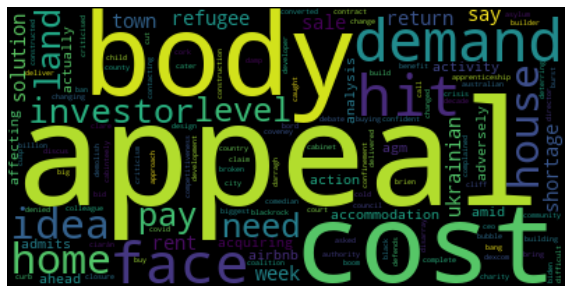

In [279]:
from wordcloud import WordCloud
text = ' '.join(_topic)

print(text)
# define some text to generate word cloud from

# create a word cloud object with default settings
wordcloud = WordCloud().generate(text)

# display the generated word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()